In [1]:
import tensorflow as tf

import os, warnings, urllib

urli = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"

In [ ]:
murl = "https://raw.githubusercontent.com/Kelrite/Air/master/Hut"

model = os.path.join(murl, "Modeler.py")

urllib.request.urlretrieve(model, "modeler.py")

helplot = os.path.join(murl, "Helplot.py")

urllib.request.urlretrieve(helplot, "helplot.py")

In [ ]:
import tensorflow as tf

import tensorflow.keras.utils as utils

ontrue = !False

utils.get_file(origin=urli, cache_dir="/tmp", extract=ontrue)

In [4]:
rooter = "/tmp/datasets/rockpaperscissors/rps-cv-images"

os.listdir(rooter)

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock']

In [5]:
os.remove(os.path.join(rooter, os.listdir(rooter)[2]))

os.listdir(rooter)

['paper', 'scissors', 'rock']

In [ ]:
image = (150, 150); split = 0.3; random = 128

unseet = 10; subset = "both"

orifile = utils.image_dataset_from_directory(
  rooter,
  seed = unseet,
  subset = subset,
  image_size = image,
  batch_size = random,
  validation_split = split
)

train, testi = orifile

In [7]:
labeler = train.class_names

labeler

['paper', 'rock', 'scissors']

In [8]:
def relater(image, label):
  image = tf.math.divide(image, 255.0)
  image = tf.cast(image, tf.float32)
  return image, label

train = train.map(relater).shuffle(1500).cache().prefetch(1)

testi = testi.map(relater)

In [9]:
import modeler

imager = modeler.Helper()

train = train.map(lambda i, l : (imager(i), l))

testi = testi.map(lambda i, l : (imager(i), l))

In [10]:
model = modeler.Hantu()

loss = "SparseCategoricalCrossentropy"

model.compile(optimizer="adam", loss=loss, metrics=["accuracy"])

In [11]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

class Matrit(Callback):
  def on_epoch_end(self, epoch, logs=None):
    if logs.get("accuracy") >= 0.85 and logs.get("val_accuracy") >= 0.85:
      self.model.stop_training = ontrue

callbacks = Matrit()

stopper = EarlyStopping(monitor="val_loss", patience=3)

In [ ]:
epochs = 18

callbacks = [callbacks, stopper]

plot = model.fit(train, validation_data=testi, epochs=epochs, callbacks=callbacks)

In [13]:
model.evaluate(train, verbose=0)

[0.3193652331829071, 0.8942558765411377]

In [14]:
model.evaluate(testi, verbose=0)

[0.3499504029750824, 0.8978658318519592]

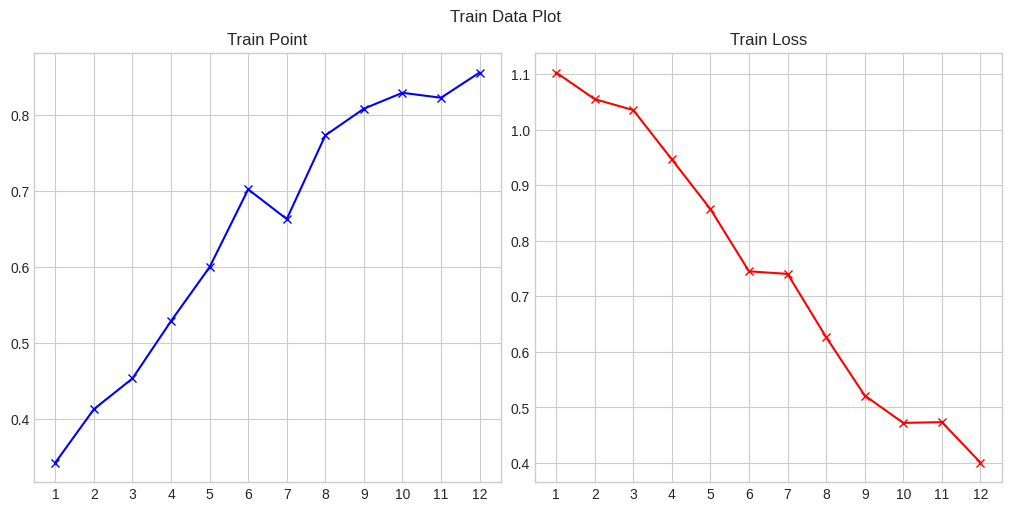

In [15]:
import helplot

plot = helplot.Helplot(plot)

plot.trainplot

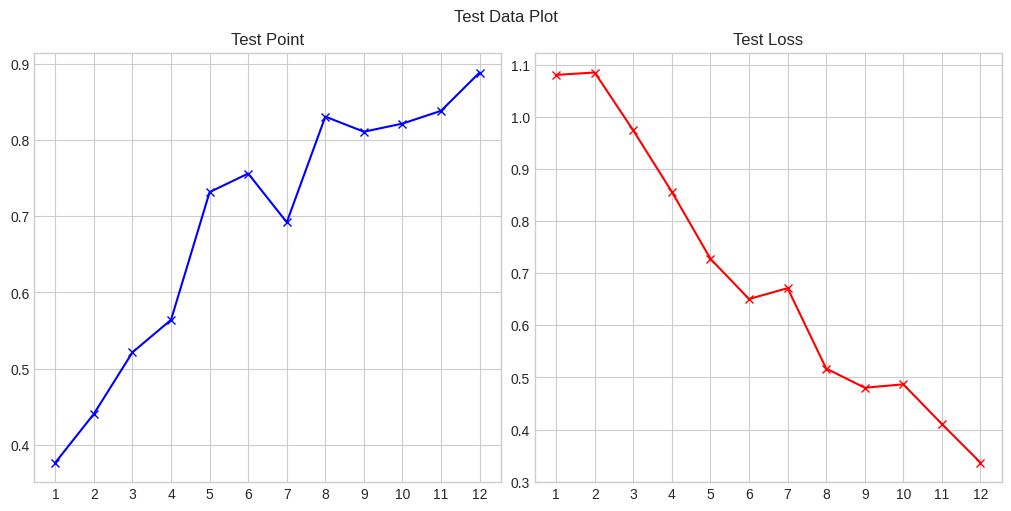

In [16]:
plot.testiplot

In [17]:
import os

molder = "/content/model"

tf.saved_model.save(model, molder)

In [18]:
meta = lambda filepath : os.path.getsize(filepath) / float(2**20)

In [19]:
import tensorflow as tf

tflite = tf.lite.TFLiteConverter

tflite_model = tflite.from_saved_model(molder)

In [20]:
optim = [tf.lite.Optimize.DEFAULT]

tflite_model.optimizations = optim

In [21]:
optim = [tf.lite.Optimize.DEFAULT]

tflite_model.optimizations = optim

In [22]:
import pathlib

tflite_model = tflite_model.convert()

tflite_model_file = pathlib.Path("modelite.tflite")

tflite_model_file.write_bytes(tflite_model)

1435976

In [23]:
round(meta("/content/modelite.tflite"), 3)

1.369

In [24]:
interpreter = tf.lite.Interpreter(model_path="/content/modelite.tflite")

interpreter.get_signature_list()

{'serving_default': {'inputs': ['input_1'], 'outputs': ['output_1']}}

In [25]:
clasilite = interpreter.get_signature_runner('serving_default')

clasilite

In [26]:
paper = "/tmp/datasets/rockpaperscissors/paper"

patest = os.path.join(paper, os.listdir(paper)[0])

patest

'/tmp/datasets/rockpaperscissors/paper/6wuALDd920vZ0qZE.png'

In [29]:
i = utils.load_img(patest, target_size=(150, 150))

i = utils.img_to_array(i)

i = tf.expand_dims(i, axis=0)

i = tf.cast(i / 255.0, tf.float32)

reclat = clasilite(input_1=i)['output_1']

reclat

array([[0.95389813, 0.04307752, 0.00302428]], dtype=float32)

In [31]:
labeler[tf.math.argmax(reclat[0])]

'paper'